In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from functions import load_and_standardize_df

Dataset Information:
This dataset includes the following features:

- age: The age of the patient.
- sex: Gender of the patient (0: female, 1: male).
- chest_pain: Type of chest pain.
- arterial_pressure: Resting blood pressure.
- total_cholesterol: Serum cholesterol.
- blood_glucose: Fasting blood sugar > 120 mg/dl.
- electrocardiogram_on_rest: Resting electrocardiographic results.
- max_heart_rate: Maximum heart rate achieved.
- exercise_produced_angina: Exercise induced angina.
- unlevel_ST: ST depression induced by exercise relative to rest.
- segment_st_in_ecg: slope of the ST segment.
- main_vessels_coloured_by_fluorescence: Coronary Artery
- thalium: thallium myocardial perfusion imaging (MPI)
- desease 

In [76]:
url = "C:\\Users\\alexa\\OneDrive\\Escritorio\\IRONHACK\\final_proyect\\csv\\heart.csv"

In [77]:
# Loads a CSV file from a URL, standardizes the column names (lowercase and replaces spaces with underscores), and sets pandas to display all columns

df = load_and_standardize_df(url)

In [78]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [79]:
rename = {
    'cp': 'chest_pain',
    'trestbps': 'arterial_pressure',
    'chol': 'total_cholesterol',
    'fbs': 'blood_glucose',
    'restecg': 'electrocardiogram_on_rest',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_produced_angina',
    'oldpeak': 'unlevel_ST',
    'slope': 'segment_st_in_ecg',
    'ca': 'main_vessels_coloured_by_fluorescence',
    'thal': 'thalium',
    'target': 'disease'
}

df.rename(columns = rename, inplace=True)

In [80]:
df

,age,sex,chest_pain,arterial_pressure,total_cholesterol,blood_glucose,electrocardiogram_on_rest,max_heart_rate,exercise_produced_angina,unlevel_ST,segment_st_in_ecg,main_vessels_coloured_by_fluorescence,thalium,disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [81]:
df.isnull().sum()

age                                      0
sex                                      0
chest_pain                               0
arterial_pressure                        0
total_cholesterol                        0
blood_glucose                            0
electrocardiogram_on_rest                0
max_heart_rate                           0
exercise_produced_angina                 0
unlevel_ST                               0
segment_st_in_ecg                        0
main_vessels_coloured_by_fluorescence    0
thalium                                  0
disease                                  0
dtype: int64

## Apply SMOTE due to the inferior number of female patients

In [82]:
# Separate features (X) and target (y)
X = df.drop(columns=['sex', 'disease'])  # Features
y = df[['sex', 'disease']]  # Target variable (gender and disease)

# Check the original class distribution
print("Original class distribution:")
print(y['sex'].value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y['sex'])  # Apply SMOTE only on the 'sex' column

# Combine the resampled data with the original 'sex' column
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['sex'] = y_resampled

# Reattach the disease column
# Create a mapping based on the original DataFrame
disease_map = df.loc[df['sex'] == 0, ['disease']].reset_index(drop=True)
# For the females (sex == 0) in the resampled DataFrame, sample the disease values
num_females = df_resampled[df_resampled['sex'] == 0].shape[0]

# Sample the disease values for the oversampled females
df_resampled.loc[df_resampled['sex'] == 0, 'disease'] = disease_map.sample(n=num_females, replace=True, random_state=42).values

# For the males (sex == 1), simply retain their original disease values from the original DataFrame
df_resampled.loc[df_resampled['sex'] == 1, 'disease'] = df.loc[df['sex'] == 1, 'disease'].sample(n=df_resampled[df_resampled['sex'] == 1].shape[0], replace=True, random_state=42).values

# Check the new class distribution
print("\nNew class distribution after SMOTE:")
print(df_resampled['sex'].value_counts())

# Display the first few rows of the resampled DataFrame
print("\nFirst few rows of the resampled DataFrame:")
print(df_resampled.head())

Original class distribution:
sex
1    207
0     96
Name: count, dtype: int64

New class distribution after SMOTE:
sex
1    207
0    207
Name: count, dtype: int64

First few rows of the resampled DataFrame:
   age  chest_pain  arterial_pressure  total_cholesterol  blood_glucose  \
0   63           3                145                233              1   
1   37           2                130                250              0   
2   41           1                130                204              0   
3   56           1                120                236              0   
4   57           0                120                354              0   

   electrocardiogram_on_rest  max_heart_rate  exercise_produced_angina  \
0                          0             150                         0   
1                          1             187                         0   
2                          0             172                         0   
3                          1             178   

In [83]:
df_resampled

,age,chest_pain,arterial_pressure,total_cholesterol,blood_glucose,electrocardiogram_on_rest,max_heart_rate,exercise_produced_angina,unlevel_ST,segment_st_in_ecg,main_vessels_coloured_by_fluorescence,thalium,sex,disease
0,63,3,145,233,1,0,150,0,2.300000,0,0,1,1,0.0
1,37,2,130,250,0,1,187,0,3.500000,0,0,2,1,0.0
2,41,1,130,204,0,0,172,0,1.400000,2,0,2,0,1.0
3,56,1,120,236,0,1,178,0,0.800000,2,0,2,1,1.0
4,57,0,120,354,0,1,163,1,0.600000,2,0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,47,2,110,267,0,0,169,0,0.000000,2,0,2,0,1.0
410,58,0,126,366,0,0,161,0,0.782512,1,0,2,0,1.0
411,49,0,133,270,0,1,162,0,0.000000,1,0,2,0,0.0
412,48,0,112,250,0,0,155,0,0.097788,1,0,2,0,0.0


In [84]:
# Create a csv file with the resampled data.
df_resampled.to_csv('df_heart.csv', index=False)

## Feature selection

In [85]:
# Select features and target variable
X = df_resampled.drop(columns=['disease'])
y = df_resampled['disease']

# Normalize features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [87]:
# Correlation Matrix

correlation_matrix = df_resampled.corr()
correlation_matrix

,age,chest_pain,arterial_pressure,total_cholesterol,blood_glucose,electrocardiogram_on_rest,max_heart_rate,exercise_produced_angina,unlevel_ST,segment_st_in_ecg,main_vessels_coloured_by_fluorescence,thalium,sex,disease
age,1.000000,-0.084544,0.319205,0.260484,0.099412,-0.089758,-0.408594,0.083414,0.223065,-0.147760,0.279002,0.049632,-0.095366,-0.010259
chest_pain,-0.084544,1.000000,0.014315,-0.077558,0.100078,0.053739,0.291218,-0.342433,-0.152582,0.150291,-0.162054,-0.107292,0.032565,-0.093427
arterial_pressure,0.319205,0.014315,1.000000,0.159387,0.153837,-0.112402,-0.069206,0.130404,0.196512,-0.131493,0.106825,0.009254,-0.068854,0.024938
total_cholesterol,0.260484,-0.077558,0.159387,1.000000,-0.022523,-0.216781,-0.007429,0.019204,0.058944,0.014397,0.031274,0.066959,-0.210237,0.043362
blood_glucose,0.099412,0.100078,0.153837,-0.022523,1.000000,-0.037581,-0.024088,0.085319,0.031666,-0.010197,0.179200,0.007720,0.153719,-0.059367
electrocardiogram_on_rest,-0.089758,0.053739,-0.112402,-0.216781,-0.037581,1.000000,-0.013704,0.009682,-0.021664,0.123586,-0.015119,0.041374,0.073944,-0.058110
max_heart_rate,-0.408594,0.291218,-0.069206,-0.007429,-0.024088,-0.013704,1.000000,-0.361881,-0.356835,0.326059,-0.235806,-0.110408,-0.083160,0.036089
exercise_produced_angina,0.083414,-0.342433,0.130404,0.019204,0.085319,0.009682,-0.361881,1.000000,0.269241,-0.168561,0.149100,0.220636,0.246802,-0.110132
unlevel_ST,0.223065,-0.152582,0.196512,0.058944,0.031666,-0.021664,-0.356835,0.269241,1.000000,-0.520985,0.257174,0.206975,0.126831,-0.139180
segment_st_in_ecg,-0.147760,0.150291,-0.131493,0.014397,-0.010197,0.123586,0.326059,-0.168561,-0.520985,1.000000,-0.039111,-0.031273,0.111251,0.039477


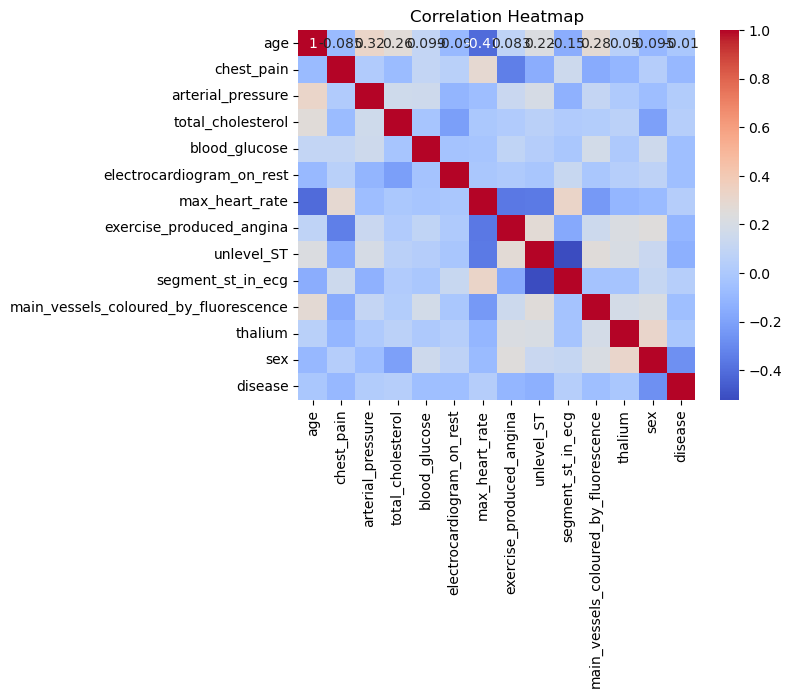

In [88]:
# Correlation Heatmap

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Logistic Regression

In [89]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [90]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[18 14]
 [11 40]]
              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59        32
         1.0       0.74      0.78      0.76        51

    accuracy                           0.70        83
   macro avg       0.68      0.67      0.68        83
weighted avg       0.69      0.70      0.70        83

Accuracy: 0.6987951807228916


## Random forest

In [91]:
# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[13 19]
 [22 29]]
              precision    recall  f1-score   support

         0.0       0.37      0.41      0.39        32
         1.0       0.60      0.57      0.59        51

    accuracy                           0.51        83
   macro avg       0.49      0.49      0.49        83
weighted avg       0.51      0.51      0.51        83

Accuracy: 0.5060240963855421


## KNeighbors

In [93]:
# Create and train the model    
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[15 17]
 [17 34]]
              precision    recall  f1-score   support

         0.0       0.47      0.47      0.47        32
         1.0       0.67      0.67      0.67        51

    accuracy                           0.59        83
   macro avg       0.57      0.57      0.57        83
weighted avg       0.59      0.59      0.59        83

Accuracy: 0.5903614457831325


## Neural Networks

In [95]:
# Create and train the model
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

c:\Users\alexa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [96]:
# Predict on the test set
y_pred = nn_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[14 18]
 [16 35]]
              precision    recall  f1-score   support

         0.0       0.47      0.44      0.45        32
         1.0       0.66      0.69      0.67        51

    accuracy                           0.59        83
   macro avg       0.56      0.56      0.56        83
weighted avg       0.59      0.59      0.59        83

Accuracy: 0.5903614457831325


## XGBoost Classifier

In [97]:
# Create and train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

c:\Users\alexa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:30:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [98]:
 # Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[ 7 25]
 [19 32]]
              precision    recall  f1-score   support

         0.0       0.27      0.22      0.24        32
         1.0       0.56      0.63      0.59        51

    accuracy                           0.47        83
   macro avg       0.42      0.42      0.42        83
weighted avg       0.45      0.47      0.46        83

Accuracy: 0.46987951807228917


## Save the trained model (Linear Regression)

In [99]:
# Save the trained model.

joblib.dump(model, 'modelo_linear_regresion.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']